# **Basics of reading csvs as pandas dataframes and plotting data with matplotlib**
---

# Import required libraries


You must run this cell first

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import os #we'll use this to navigate directories 

from google.colab import files #we'll use this to interact with our google drive

import datetime  #we'll use this when working with time series

%matplotlib inline

# Reading in data 

## Method 1: Files stored in your google drive

**Mounting your Google Drive:**

This is necessary for accessing data in your google drive or saving files that you might want to use later. Here, I mount my own Google Drive. When you run this cell, it will mount *YOUR* Google Drive folder. You will be prompted to authenticate by going to a URL and copying/pasting an authentication code. 


I also create a variable called "home" which will point to the google drive folder associated with this class in my drive. 
 You can modify the "home" variable to point to wherever you'd like to store files from this class on your google drive. 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

home = '/content/drive/My Drive/PhysHydro2020' # Here, I store the location of all files associated with this class 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Writing via google drive:**
Now that you've mounted your drive, you can read and write files into your drive. For example, we can make an arbitrary [pandas dataframe ](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) and save it as a csv called "test" in your home folder. 

In [ ]:
x = pd.DataFrame({'x':[2,3]}) #make a dataframe called "x"
filename = 'test.csv' #make a variable with the name of the file
data_path = os.path.join(home, filename) #make the file path out of your home folder and the name of the file 

# Note: you can always add more folders to your home folder in google drive and specify those folders here, for example, I made a folder called "PS1" in my google drive
# data_path = os.path.join(home, 'PS1','test.csv') #make the file path out of your home folder and the name of the file

x.to_csv(data_path) #turn your dataframe "x" into a csv and save it to the location "datapath"


**Reading via google drive:** If I want to read in a csv from google drive, I can do something similar. Let's read in the file we just wrote. 

In [ ]:
data_path = os.path.join(home, filename) #this is where the file is located
df = pd.read_csv(data_path) #this reads the contents of the csv and creates a variable called "df" that is a pandas DataFrame 

df.head() #this command will preview the dataframe for you 

## Method 2: From your local hard drive 

You can upload a file from your local computer to your current google colab session by executing the following command, which prompts you to navigate to the file. 

In [ ]:
uploaded = files.upload()

Now the file is uploaded to your google colab session. You can verify this by clicking on the folder icon on the left side of your colab screen and seeing a list of files that you've uploaded or downloaded during this session. 

Now that the file is available to us, we need to read it in as a csv. This requires us to know the filename. 

In [ ]:
filename = 'test.csv' #you need to replace this with your filename that you just uploaded 
df = pd.read_csv(filename)
df.head()

## Method 3: From a url 

There are many instances where you'd want to access data from a csv that is posted online. 

For example, USGS stream gauge data is available online and can be accessed via URL. 

I am going to walk you through how to download USGS streamgauge data via URL and then we will make a function to do this for us! 

In [ ]:
#first we need to define the station number and the time interval we want to search
site = '08161000'
start = '1900-01-01'
stop = '2019-12-30'

#then we can construct the url 
url = 'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=' + site + '&referred_module=sw&period=&begin_date='+start+'&end_date='+stop

print(url)


https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=08161000&referred_module=sw&period=&begin_date=1900-01-01&end_date=2019-12-30


Navigate to that url and take a look at the format of the data. There's a huge header and lots of columns. We will need to deconstruct this so that we can create a pandas dataframe that has just the date/time and stream discharge.

In [ ]:
#we can read the csv by simply using the pd.read_csv command.  In this case, we need to ignore the first 31 lines of the csv because it is part of the header. 
df = pd.read_csv(url, header=31, delim_whitespace=True)

# we can name each of the columns in the dataset with our own names by using the command df.columns. note that you must have the same number of entries here as you do columns in your dataframe. 
df.columns = ['usgs', 'site_number', 'datetime', 'discharge, ft3/s', 'a', 'b','c','d','e']

#we need to convert the dates to a datetime format that python understands
df['Date'] = pd.to_datetime(df.datetime)

#finally, we can create a clean dataframe and name the columns with names we understand
df = df[['discharge, ft3/s','Date']]
df['discharge, ft3/s'] = df['discharge, ft3/s'].astype(float, errors='ignore')  #this is needed because sometimes there are non-numeric entries and we want to ignore them
df.set_index('Date',inplace=True) #pandas dataframes have an index column- for timeseries, we usually assign the datetime as the index 

df.head()

,"discharge, ft3/s"
Date,
1916-05-22,18200.0
1916-05-23,33400.0
1916-05-24,15600.0
1916-05-25,7300.0
1916-05-26,4830.0


We can make this series of steps into a function. The inputs will be site, start, and stop, and the output will be a timeseries of discharge stored as a pandas dataframe. 

In [ ]:
def getFlow(site,start,stop):  #this is how a function is defined 
    url = 'https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=' + site + '&referred_module=sw&period=&begin_date='+start+'&end_date='+stop
    df = pd.read_csv(url, header=31, delim_whitespace=True)
    df.columns = ['usgs', 'site_number', 'datetime', 'discharge, ft3/s', 'a', 'b','c','d','e']    
    df['Date'] = pd.to_datetime(df.datetime)
    df = df[['discharge, ft3/s','Date']]
    df['discharge, ft3/s'] = df['discharge, ft3/s'].astype(float, errors='ignore')
    df.set_index('Date',inplace=True)
    return df #this line ensures that the output is the variable df 

# Plotting data: 
Example: USGS streamflow data for Problem Set 1 

Now that we've created a function to create a dataframe that stores a timeseries of streamflow data from a USGS streamgauge, let's plot the data. First, we'll create the dataframe using our new function "getFlow"

In [ ]:

site = '08158000' #you need to add a site number here, it needs to be in quotes (e.g. '08158000')
start = '2000-10-01'#you need to add a start date here,  it needs to be in quotes (e.g. '2019-12-30')
stop = '2019-10-01'#you need to add an end date here
df= getFlow(site,start,stop)
df.head()


,"discharge, ft3/s"
Date,
2000-10-01,1210.0
2000-10-02,1180.0
2000-10-03,912.0
2000-10-04,807.0
2000-10-05,231.0


There are several ways to plot data stored in a pandas dataframe. Here's one. 

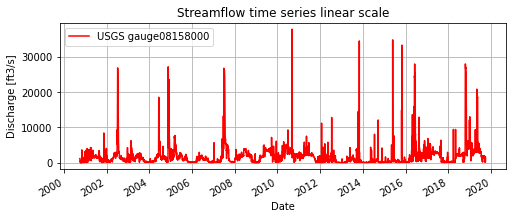

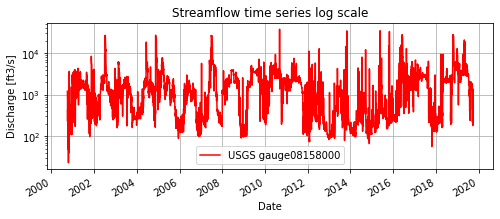

In [ ]:
#linear scale plot: 

f,ax = plt.subplots(1,figsize=(8,3))

#set some variables 
x = df.index #we want to plot the index (datetime) on the x axis
y = df['discharge, ft3/s']

#plot the variables
plt.plot(x,y,color='red',label='USGS gauge'+str(site))

#make the plot pretty
ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series linear scale')
ax.legend()
f.autofmt_xdate()## this rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them


#log scale plot: 
## if we want to see the same data plotted with the y axis in log scale, all we need to do is set the yscale to log (see below)

f,ax = plt.subplots(1,figsize=(8,3))

#set some variables 
x = df.index #we want to plot the index (datetime) on the x axis
y = df['discharge, ft3/s']

#plot the variables
plt.plot(x,y,color='red',label='USGS gauge'+str(site))

#make the plot pretty
ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series log scale')
ax.legend()
f.autofmt_xdate()## this rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them

##set the yscale to log
# ax.set_yscale('log') #<-- this is the command you need to set the yscale to log. 

# #if you want to save your figure to your local hard drive you can use this: 
# plt.savefig('example.pdf')
# files.download('example.pdf')

Problem Set 1 asks you to consider three different gauges
  
1.   08158000 Colorado River gauge at Austin, TX
2.   08161000 Colorado Rv at Columbus, TX 
3.   08159200 Colorado Rv at Bastrop,TX

There are several ways to plot all three datasets on the same plot. We'll try two different ways. First without a loop, second with a loop. 

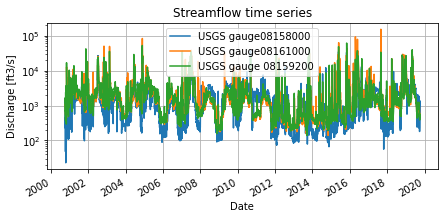

In [ ]:
#without a loop, just repeating the code. 

f,ax = plt.subplots(1,figsize=(7,3))

site = #'08158000' #you need to add a site number here, it needs to be in quotes, e.g. '08158000'
df = getFlow(site,start,stop)
x = df.index #we want to plot the index (datetime) on the x axis
y = df['discharge, ft3/s']
plt.plot(x,y,label='USGS gauge'+str(site))

site = #'08161000'#you need to add a site number here
df = getFlow(site,start,stop)
x = df.index #we want to plot the index (datetime) on the x axis
y = df['discharge, ft3/s']
plt.plot(x,y,label='USGS gauge'+str(site))

site = #'08159200'#you need to add a site number here
df = getFlow(site,start,stop)
x = df.index #we want to plot the index (datetime) on the x axis
y = df['discharge, ft3/s']
plt.plot(x,y,label='USGS gauge '+str(site))

ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series')
ax.legend()
f.autofmt_xdate()## this rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them

## if we want to see the same data plotted with the y axis in log scale, we need to set the yscale to log
# ax.set_yscale('log') 

##if we want to change the xlimits to only look at the time around hurricane harvey, we use set_xlim: 
# ax.set_xlim([datetime.date(2017,8,1), datetime.date(2017,10,1)])

(736542.0, 736603.0)

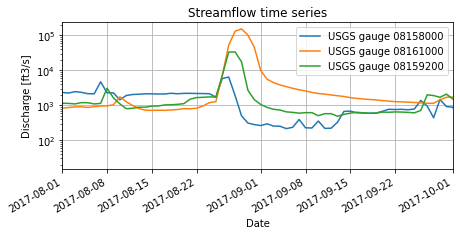

In [ ]:
#with a loop

sites = #['08158000','08161000','08159200'] #you need to add a list of sites separated by commas, the site number needs to be in quotes]
start = #'2000-10-01'#you need to add a start date here,  it needs to be in quotes (e.g. '2019-12-30')
stop = #'2019-10-01'#you need to add an end date here

f,ax = plt.subplots(1,figsize=(7,3))

for site in sites: 
  df = getFlow(site,start,stop)
  x = df.index #we want to plot the index (datetime) on the x axis
  y = df['discharge, ft3/s']
  plt.plot(x,y,label='USGS gauge '+str(site))
  
ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series')
ax.legend()
f.autofmt_xdate()## this rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them

## if we want to see the same data plotted with the y axis in log scale, we need to set the yscale to log
# ax.set_yscale('log') 

##if we want to change the xlimits to only look at the time around hurricane harvey, we use set_xlim: 
# ax.set_xlim([datetime.date(2017,8,1), datetime.date(2017,10,1)])


To find the max, min, mean, we need to perform calculations using the data stored in the data frame. Here are some examples for how to do those kinds of computations using numpy. 

First, if we only want to look at the max and min over a particular data range, then we need to filter the data. 


In [ ]:
##To filter the data, we will create a new dataframe from just the rows that we need by specifying which values of the indices we are looking for. 

start= #'2010-10-01'#you need to add a start date here, it needs to be in quotes (e.g. '2019-12-30')
stop = #'2010-11-01'#you need to add an end date here
df2 = df[(df.index>start)&(df.index<stop)]
df2.head()


,"discharge, ft3/s"
Date,
2010-10-02,1070.0
2010-10-03,1050.0
2010-10-04,1060.0
2010-10-05,1120.0
2010-10-06,1130.0


In [ ]:
#we can find the min and max by following our dataframe and column with the .min() command
min_q = df2['discharge, ft3/s'].min()
max_q = df2['discharge, ft3/s'].max()

min_date = df2[['discharge, ft3/s']].idxmin() #this gives us the index value (in this case date) of the min value over the whole data frame. in this case we only have one column so it will be the minimum value in the discharge column. 
max_date = df2[['discharge, ft3/s']].idxmax() 

print('the minimum discharge of '+ str(min_q)+ ' ft3/s occurred on: ' + str(min_date))
print('the maximum discharge of '+ str(max_q)+ ' ft3/s occurred on: ' + str(max_date))


the minimum discharge of 388.0 ft3/s occurred on: discharge, ft3/s   2010-10-19
dtype: datetime64[ns]
the maximum discharge of 1130.0 ft3/s occurred on: discharge, ft3/s   2010-10-06
dtype: datetime64[ns]


Since the data are reported in one day intervals (check this out for yourself!), we can just take the mean of the data to compute the average daily discharge over either the entire record that we searched for, or the short record that we filtered. 


In [ ]:
LTavg_q_ft3s = df['discharge, ft3/s'].mean()
STavg_q_ft3s = df2['discharge, ft3/s'].mean()

##to convert from ft3/s to m3/s we can perform basic arithmetic on the dataframe column 
LTavg_q_m3s = LTavg_q_ft3s*0.0283168
STavg_q_m3s = STavg_q_ft3s*0.0283168


Now we can plot all of these values on the plot with the data! 

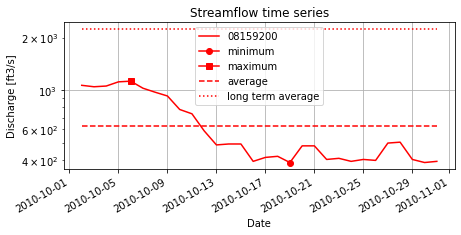

In [ ]:

f,ax = plt.subplots(1,figsize=(7,3))

plt.plot(df2.index,df2['discharge, ft3/s'],label=str(site),color='red')
plt.plot(min_date, min_q,marker='o',label='minimum',color='red')
plt.plot(max_date, max_q,marker='s',label='maximum',color='red')

##if we want to plot a line across the time series at the longterm and shortterm average values, then we need to set up end points along the x axis and a corresponding value for each end point so that we can plot a line. 
x = [df2.index[0],df2.index[-1]] #this will take the first and last value in the df2.index, i.e. [0] is the first value, and [-1] gives the last value.  
y = [STavg_q_ft3s, STavg_q_ft3s] 
plt.plot(x,y,color='red',linestyle='--',label='average')

x = [df2.index[0],df2.index[-1]]
y = [LTavg_q_ft3s, LTavg_q_ft3s] 
plt.plot(x,y,color='red',linestyle=':',label='long term average')

ax.set_yscale('log') 
ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series')
ax.legend()
f.autofmt_xdate()


Now if we want to look at all of the gauges together, we can create a loop. 

Here, we'll add to the loop we built before and include the min, max, and average discharge for each station on the same plot. 

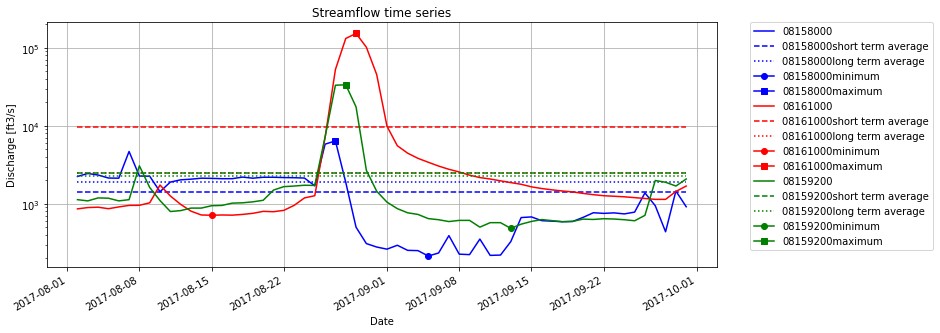

In [ ]:
sites = ['08158000','08161000','08159200'] #you need to add a list of sites separated by commas, the site number needs to be in quotes]
start = '2000-10-01'#you need to add a start date here,  it needs to be in quotes (e.g. '2019-12-30')
stop = '2019-10-01'#you need to add an end date here


f,ax = plt.subplots(1,figsize=(12,5)) #create a figure for us to fill 

colors = ['blue','red','green']
for i in range(len(sites)): 
  site = sites[i]
  color = colors[i]

  df = getFlow(site,start,stop)

  #compute long term average:  
  LTavg_q_ft3s = df['discharge, ft3/s'].mean()

  #filter short term data set and plot it:
  start2 = '2017-08-01'
  stop2 = '2017-10-01'
  df2 = df[(df.index>start2)&(df.index<stop2)]
  x = df2.index 
  y = df2['discharge, ft3/s']
  plt.plot(x,y,label=str(site),color=color)

  #compute short term average:  
  STavg_q_ft3s = df2['discharge, ft3/s'].mean()
  
  #plot short and long term averages: 
  
  x = [df2.index[0],df2.index[-1]] #this will take the first and last value in the df2.index, i.e. [0] is the first value, and [-1] gives the last value.  
  y = [STavg_q_ft3s, STavg_q_ft3s] 
  plt.plot(x,y,color=color,linestyle='--',label=str(site)+'short term average')

 
  x = [df2.index[0],df2.index[-1]]
  y = [LTavg_q_ft3s, LTavg_q_ft3s] 
  plt.plot(x,y,color=color,linestyle=':',label=str(site)+'long term average')
 

  #plot max and min 
  min_q = df2['discharge, ft3/s'].min()
  min_date = df2[['discharge, ft3/s']].idxmin() #this gives us the index value (in this case date) of the min value over the whole data frame. in this case we only have one column so it will be the minimum value in the discharge column. 
  plt.plot(min_date, min_q,marker='o',label=str(site)+'minimum',color=color)

  max_q = df2['discharge, ft3/s'].max()
  max_date = df2[['discharge, ft3/s']].idxmax() 
  plt.plot(max_date, max_q,marker='s',label=str(site)+'maximum',color=color)

ax.set_yscale('log') 
ax.grid()
ax.set(xlabel='Date', ylabel='Discharge [ft3/s]',title='Streamflow time series')
f.autofmt_xdate()## this rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) ##this puts the legend on the outside. 



# Optional Next Steps: Hurricane Laura



Look at the map of current stream conditions in the US: 
https://waterdata.usgs.gov/nwis/rt

Find stations that might have been impacted by the storm surge or precipitation associated with Hurricane Laura and plot stream flow time series for those gauges. How does the peak flow compare to previous peak flows? 